---
# <font color="#CA3532">Práctica 3 de Neurocomputación</font>
### Curso 2021-2022
### Escuela Politécnica Superior – Universidad Autónoma de Madrid

---

Fechas de entrega:
- Grupo 2462: lunes 16 de mayo de 2022
- Grupo 2461: martes 17 de mayo de 2022

---

Última actualización: 31-03-2022

---

*Sesión 1*:

- Esta práctica está centrada en [Keras](https://keras.io/).

- Keras es una biblioteca de redes neuronales de código abierto, diseñada para la experimentación con redes neuronales profundas. Keras es modular, extensible y fácil de usar.

- Keras puede usar distintos motores. Aquí se usará con TensorFlow.



In [918]:
### Incluid vuestros nombres, pareja y grupo aquí:
estudiantes = [{'nombre': 'Zhijie Qian', 'pareja': 'P05', 'grupo': '2461'},
               {'nombre': 'Santo Saenz Ferrero', 'pareja': 'P05', 'grupo': '2461'}]


### <font color="#CA3532">Importación de bibliotecas</font>

TensorFlow 2.0 incluye oficialmente Keras.

In [919]:
# Importaciones

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

### <font color="#CA3532">Datos del problema</font>

El problema consiste en predecir si va a haber una erupción solar (*solar flares*) en ciertas regiones solares en función de las características de la región solar. El conjunto datos y la caracterización de sus atributos puede encontrarse en https://www.openml.org/d/40702. El siguiente fragmento de código permite cargar estos datos.

In [920]:
dataset_url = 'https://www.openml.org/data/get_csv/4965303/flare.arff' 

dataset = np.genfromtxt(dataset_url, delimiter=',', skip_header=1)

### -------------------------------------------------------------------------------
### Dividid los ejemplos en atributos y clases. Guardad el número de atributos.
### -------------------------------------------------------------------------------

x = dataset[:,:-1]
x_size = x.shape[1]
y = dataset[:,-1]

In [921]:
# Resultados de la división y el número de atributos

print('Ejemplo 0:', x[0], y[1])
print('Atributos:', x_size)
print('Clases:', np.unique(y))
print('Recuento de clases:', y.tolist().count(0), y.tolist().count(1))
print('Examplos:', len(x))

Ejemplo 0: [5. 4. 3. 1. 3. 1. 1. 2. 1. 1.] 0.0
Atributos: 10
Clases: [0. 1.]
Recuento de clases: 884 182
Examplos: 1066


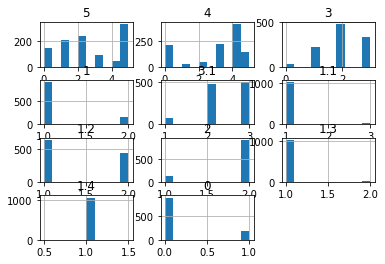

In [922]:
# create pairwise scatter plots of numeric input variables
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# load the csv file as a data frame
df = read_csv(dataset_url, header=1)

# histograms of all variables 
df.hist()
pyplot.show()

In [923]:
print(df.head(20))

    5  4  3  1  3.1  1.1  1.2  2  1.3  1.4  0
0   1  3  1  1    2    1    1  2    1    1  0
1   2  3  2  1    3    1    1  2    1    1  1
2   5  4  3  2    2    1    2  2    1    1  0
3   1  4  2  1    3    1    1  2    1    1  0
4   1  4  2  1    2    1    2  2    1    1  0
5   2  2  1  1    3    1    2  2    1    1  0
6   2  3  2  1    3    1    1  2    1    1  0
7   0  5  2  1    2    1    1  2    1    1  0
8   2  1  2  1    2    1    2  2    1    1  0
9   3  0  1  2    2    1    2  2    1    1  0
10  2  0  1  2    3    1    2  2    1    1  0
11  1  4  2  1    3    1    1  2    1    1  0
12  1  3  2  1    2    1    2  2    1    1  0
13  5  4  3  1    2    1    1  2    1    1  0
14  2  4  2  1    3    1    1  2    1    1  1
15  2  0  1  1    3    1    2  2    1    1  0
16  3  4  1  1    2    1    2  2    1    1  0
17  1  3  2  1    3    1    1  2    1    1  0
18  5  4  3  1    1    1    2  2    1    1  0
19  5  3  3  1    1    1    1  2    1    1  1


In [924]:
print(df.describe())

                 5            4            3            1          3.1  \
count  1065.000000  1065.000000  1065.000000  1065.000000  1065.000000   
mean      2.625352     2.957746     2.034742     1.153991     2.400939   
std       1.844397     1.703904     0.806293     0.361109     0.620604   
min       0.000000     0.000000     0.000000     1.000000     1.000000   
25%       1.000000     2.000000     2.000000     1.000000     2.000000   
50%       2.000000     4.000000     2.000000     1.000000     2.000000   
75%       5.000000     4.000000     3.000000     1.000000     3.000000   
max       5.000000     5.000000     3.000000     2.000000     3.000000   

               1.1          1.2            2          1.3     1.4            0  
count  1065.000000  1065.000000  1065.000000  1065.000000  1065.0  1065.000000  
mean      1.059155     1.404695     1.875117     1.025352     1.0     0.170892  
std       0.320469     0.491063     0.330741     0.157266     0.0     0.376591  
min      

In [925]:
# Normalizad los datos (si es necesario)
# Los datos se encuentran en diferentes intervalos de valores por lo que el modelo puede tender 
# a ponderar más los datos con rangos de valores mayores, por ello se ha decidico escalar los 
# datos de la forma que se nos proporciona.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [926]:
print(x.shape)

(1066, 10)


### <font color="#CA3532">Definición del modelo</font>

- Cada capa del modelo lleva definidas una serie de propiedades (tamaño, función de activación, conectividad, etc.). 

- Usaremos el modelo secuencial que Keras para crear una red neuronal multicapa con propagación hacia adelante.



In [927]:
# Definid el modelo con Keras

nn = Sequential()

### -------------------------------------------------------------------------------
### Añadir la capas completamente conectadas que consideréis al modelo
### -------------------------------------------------------------------------------
nn.add(Dense(12, activation="sigmoid"))
nn.add(Dense(12, activation="sigmoid"))
nn.add(Dense(1, activation="sigmoid"))

### <font color="#CA3532">Compilación de la red neuronal</font>

- La compilación es la operación que contruye la red neuronal.

- La compilación incluye aspectos que se tendrán en cuenta en el entrenamiento de la red neuronal.

- En la secciones de abajo encontraréis enlaces a la documentación oficial donde podréis encontrar información sobre las distintas estrategias de cada uno de los aspectos.

- También es posible definid vuestras propias funciones.

#### <font color="#CA3532">Optimizador</font>

El optimizador es la estrategia para calcular las correcciones de los pesos.

https://keras.io/api/optimizers/


#### <font color="#CA3532"> Función de error (*Loss function*)</font>

La función de error calcula la cantidad que el modelo debe minimizar durante el entrenamiento.

https://keras.io/api/losses/

#### <font color="#CA3532">Métricas</font>

Una métrica es una función que juzga la actuación del modelo. Son funciones similares a las funciones de error pero, a diferencia de estas, no se aplican durante el entrenamiento, sino sobre los resultados. Aprende al menos el significado y las diferencias de las métricas *accuracy*, *precision*, *recall* y *AUC*. También pueden usarse las funciones de error como metricas.

https://keras.io/api/metrics/

In [928]:
# Compilación

### -------------------------------------------------------------------------------
### Compilad vuestro modelo de red neuronal
### -------------------------------------------------------------------------------

metrics = [
            #keras.metrics.TruePositives(name='tp'),
            #keras.metrics.FalsePositives(name='fp'),
            #keras.metrics.TrueNegatives(name='tn'),
            #keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='ACC'),
            keras.metrics.Precision(name='Prec'),
            keras.metrics.Recall(name='Rec'),
            keras.metrics.AUC(name='AUC'),
            #keras.metrics.AUC(name='PRC', curve='PR'),
          ]

nn.compile(optimizer='SGD', loss="mse", metrics=metrics)
# nn.compile(optimizer='Adam', loss="binary_crossentropy", metrics=metrics)

### <font color="#CA3532">Conjuntos de entrenamiento y validación</font>

Usaremos el 80 % de los datos para entrenamiento y el 20 % para validación. Usaremos también la técnica de muestreo estratificado (también están permitidas otras formas de validación). Averigua qué es y para qué sirve.

In [929]:
# Contrucción de los conjuntos de entrenamiento y validación

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size=0.2) 
"""
A partir de la técnica de muestreo estratificado los datos se dividen por una característica 
común, en este caso por la clase objetivo, por ello los datos se obtienen en train y validación 
de forma equilibrada teniendo en ambos proporcion especificada por test_size para cada clase objetivo
"""

'\nA partir de la técnica de muestreo estratificado los datos se dividen por una característica \ncomún, en este caso por la clase objetivo, por ello los datos se obtienen en train y validación \nde forma equilibrada teniendo en ambos proporcion especificada por test_size para cada clase objetivo\n'

### <font color="#CA3532">Visualización de resultados</font>

Para la visualización de los resultados utilizaremos gráficas con la evolución de la función de pérdida y las métricas en cada época del entrenamiento, tanto para los datos de entrenamiento como para los de validación.

También obtendremos la matriz de confusión y alguna métricas sobre cada clase del problema. Observaremos especialmente la medida macro-F1.

In [930]:
from sklearn.metrics import classification_report, confusion_matrix

def show_metrics(history):
    for metric in history.history.keys():
        if not metric.startswith('val_'):
            plt.plot(history.history[metric], label=metric)
            plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
            plt.title(metric)
            plt.ylabel('')
            plt.xlabel('Epoch')
            plt.legend(loc="upper left")
            plt.show()

### <font color="#CA3532">Entrenamiento de la red neuronal y evaluación</font>

El método "fit" entrena una red neuronal con los datos que se le proporcionen.

https://keras.io/api/models/model_training_apis/#fit-method

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                132       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________





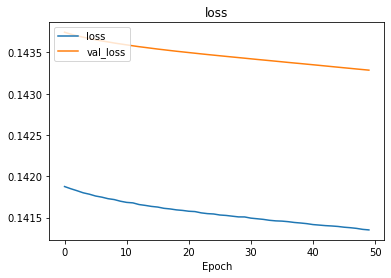

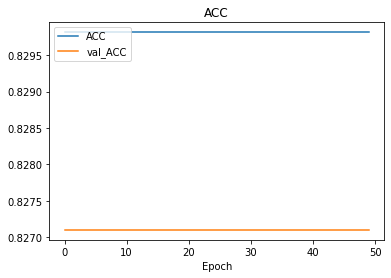

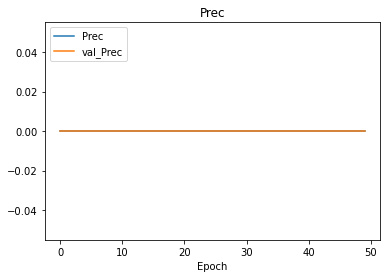

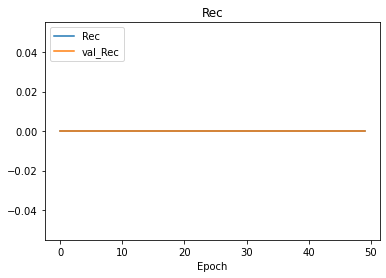

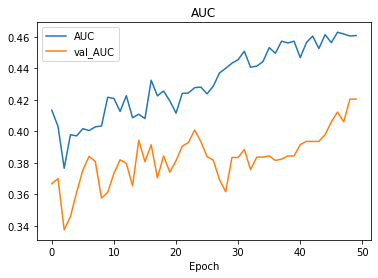

[[177   0]
 [ 37   0]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       177
         1.0       0.00      0.00      0.00        37

    accuracy                           0.83       214
   macro avg       0.41      0.50      0.45       214
weighted avg       0.68      0.83      0.75       214



In [931]:
# Entrenamiento

epochs = 50

history = nn.fit(x_train, y_train, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

# Predicciones del conjunto de evaluación

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

# Detalles de la red neuronal

nn.summary()
print('\n\n')

# Visualización de las métricas 

show_metrics(history)

# Matriz de confusión

print(confusion_matrix(y_val, y_pred))

# Observa la medida macro-f1 del siguiente informe

print(classification_report(y_val, y_pred, zero_division=0))


### <font color="#CA3532">Entrenamiento de la red neuronal y evaluación</font>
Como podrás haber observado en problema no está balanceado (o está bastante desequilibrado), porque el número de ejemplos de cada clase es muy diferente.

Existen varias técnicas para abortar este tipo de problemas. Una de ellas consiste seleccionar un subconjunto de datos equilibrados en el que las dos clases esten representadas en la misma proporción.


In [932]:
# En este caso de encima, el dataset se divide en dos subconjuntos con la misma proporción para sus distintas clases
from sklearn.model_selection import StratifiedKFold, KFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(x, y)
for train_index, test_index in skf.split(x, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [933]:
# En este caso además de dividir el dataset en 5 subconjutnos con la misma proporción de clases, los datos se han 
# mezclado para que los datos de cada subconjunto no tengan porque estar ordenados secuencialmente de la forma que 
# venían en su dataset
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [934]:
### -------------------------------------------------------------------------------
### Assigna diferentes pesos a cada una de las clases
### -------------------------------------------------------------------------------
# Se hara solo u split para conseguir una division de los datos porporcional en cuanto al numero de clases a obtener
# en el conjunto de train y de test, no hacen falta más divisiones, si se hicieran más se desaprovecharía datos. 
# Por otra parte se utilizará randomized para que los datos en cada subconjunto no estén ordenados secuencialmente.
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(x, y):
    x_train_balanceado, x_val_balanceado = x[train_index], x[test_index]
    y_train_balanceado, y_val_balanceado = y[train_index], y[test_index]

# Debido a que la proporcion de datos segun la clase es de 177/37 a favor de la clase 0, con el fin de que el modelo no
# sobre estime para la clase 0 se le dará a la clase 0 un valor 1 y a la clase 1 un valor 177/37 que aproximadamente deberñia
# ser un valor óptimo para el peso de esta clase
class_weights = { 0 : 0.206 , 1 : 177/37}

In [935]:
print(y_train_balanceado.tolist().count(0), y_val_balanceado.tolist().count(0))
print(y_train_balanceado.tolist().count(1), y_val_balanceado.tolist().count(1))
# Balanceado siendo la validacion 20% y train 80%

707 177
145 37


Vuelve a entrenar con este nuevo conjunto de datos y observa como varía el resultado de la matriz de confusión. Si es posible, intenta conseguir un modelo mejor y describe los resultados alcanzados.

In [936]:
history = nn.fit(x_train_balanceado, y_train_balanceado, epochs=epochs, verbose=0, class_weight=class_weights, validation_data=(x_val_balanceado, y_val_balanceado))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val_balanceado)
print(y_pred)
y_pred = y_pred > 0.5

print(classification_report(y_val_balanceado, y_pred, zero_division=0))

print(confusion_matrix(y_val_balanceado, y_pred))
# La matriz de confusión en funcion del valor se le de a los pesos tiene una 
# precisión total para los registros de una clase y precisión nula para la otra clase

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                132       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________



[[0.8135359 ]
 [0.8137009 ]
 [0.82021356]
 [0.8127833 ]
 [0.82021356]
 [0.8157928 ]
 [0.81381977]
 [0.8157207 ]
 [0.8147751 ]
 [0.81382763]
 [0.8077593 ]
 [0.8148954 ]
 [0.8244077 ]
 [0.81379735]
 [0.8193105 ]
 [0.8077593 ]
 [0.8198946 ]
 [0.81381977]
 [0.8136904 ]
 [0.8144865 ]
 [0.81401914]
 [0.8071389 ]
 [0.81598

Otra técnica consiste en asignar un peso a cada clase para que lo tenga en cuenta en algoritmo de entrenamiento.
Aprende lo que hace el parámetro ```class_weight``` de ```fit``` (https://keras.io/api/models/model_training_apis/#fit-method) y explícalo.

In [937]:
### -------------------------------------------------------------------------------
### Assigna diferentes pesos a cada una de las clases
### -------------------------------------------------------------------------------

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_balanceado), y=y_train_balanceado)

class_weights = {0: class_weights[0], 1: class_weights[1]}

print(class_weights)
# El modelo para el atributo class_weights lo que hace es mutiplicarlo por el error obtenido en la función de error dependiendo de 
# la clase objetivo, con el fin de que el optimizador, al computar los errores de ciertas clases de forma mayor, tenderá a minimizar el
# error en esas clases si tienen un weight en class_weights alto

{0: 0.6025459688826026, 1: 2.9379310344827587}


Vuelve a entrenar considerando distintos pesos y observa como varía el resultado de la matriz de confusión. Si es posible, intenta conseguir un modelo mejor y describe los resultados alcanzados.

In [938]:
history = nn.fit(x_train_balanceado, y_train_balanceado, epochs=epochs, verbose=0, class_weight=class_weights, validation_data=(x_val_balanceado, y_val_balanceado))

# Detalles de la red neuronal

nn.summary()
print('\n\n')

y_pred = nn.predict(x_val)
print(y_pred)
y_pred = y_pred > 0.5
print(classification_report(y_val, y_pred, zero_division=0))

print(confusion_matrix(y_val, y_pred))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                132       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________



[[0.5075648 ]
 [0.5065116 ]
 [0.4938955 ]
 [0.49521345]
 [0.5064566 ]
 [0.5011777 ]
 [0.4885501 ]
 [0.47912097]
 [0.49483946]
 [0.50206256]
 [0.5108307 ]
 [0.5034348 ]
 [0.50401074]
 [0.48128778]
 [0.4987133 ]
 [0.48925135]
 [0.5149227 ]
 [0.5007137 ]
 [0.50162417]
 [0.48128778]
 [0.48772582]
 [0.48128778]
 [0.48128

### <font color="#CA3532">Optimización del diseño de la red neuronal</font>

- Cambiad la arquitectura de la red neuronal introduciendo más capas y neuronas para conseguir mejores resultados:
 - Añadid más capas o diferente tipo de capas.
 - Cambiad las funciones de activación.
 - Cambiad la función de error o el optimizador.

- Utilizad ```tuner``` para la búsqueda de estos hiperparámetros (https://keras.io/keras_tuner/).


In [939]:
!pip install -U keras-tuner
import keras_tuner
from kerastuner.tuners import RandomSearch

In [1008]:
### -------------------------------------------------------
### Define tu hipermodelo
### -------------------------------------------------------

# La combinación de la precisión y recall es lo que identifica el modelo con
# mejor rendimiento para la clasificación binaria. Debido a que la métrica F-beta, 
# la cual es una combinación entre precisión y recall no se encuentra implementada
# por Keras se ha diseñado una metrica personalizada apondandonos en la librería
# sklearn la cual tiene una implementación para esta función
from sklearn.metrics import fbeta_score
def binary_fbeta(ytrue, ypred, beta=1.0, threshold=0.5):
    ypred = np.array(ypred >= threshold, dtype=np.float32)
    return fbeta_score(ytrue, ypred, beta)


def build_model(hp):
    nn = Sequential()
    nn.add(Dense(hp.Int('units', 1, 100), activation="sigmoid"))
    nn.add(Dense(hp.Int('units', 1, 100), activation="sigmoid"))
    nn.add(Dense(hp.Int('units', 1, 100), activation="sigmoid"))
    nn.add(Dense(1, activation="sigmoid"))
    nn.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss="mse", metrics=binary_fbeta)
    return nn

### -------------------------------------------------------
### Pon en marcha la búsqueda de hiperparámetros, elije el 
### objetivo más adecuado.
### -------------------------------------------------------

tuner = RandomSearch(build_model, objective='val_ACC', max_trials=50, executions_per_trial=3) 

tuner.search_space_summary()

tuner.search(x_train_balanceado, y_train_balanceado, epochs=epochs, class_weight=class_weights, validation_data=(x_val_balanceado, y_val_balanceado), verbose=0)

tuner.results_summary()

best_nn = tuner.get_best_models(num_models=1)

y_pred = best_nn[0].predict(x_val)
y_pred = y_pred > 0.452

print(confusion_matrix(y_val, y_pred))

print(classification_report(y_val, y_pred, zero_division=0))

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
learning_rate: 0.01
Score: 0.7943925261497498
Trial summary
Hyperparameters:
learning_rate: 0.001
Score: 0.7897196213404337
Trial summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.66978191335996
[[123  54]
 [  9  28]]
              precision    recall  f1-score   support

         0.0       0.93      0.69      0.80       177
         1.0       0.34      0.76      0.47        37

    accuracy                           0.71       214
   macro avg       0.64      0.73      0.63       214
weighted avg       0.83      0.71      0.74       214

In [1019]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_absolute_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [1016]:
best_nn[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 11        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


### <font color="#CA3532">Diseño final de la red neuronal</font>
Define ahora tu modelo final y muestra los resultados de su evaluación.

In [1022]:
### ---------------------------------------------------------------------------
### Modelo final y evaluación
### ---------------------------------------------------------------------------

nn_final = Sequential()
nn_final.add(Dense(1, activation="sigmoid"))
nn_final.add(Dense(1, activation="sigmoid"))
nn_final.add(Dense(1, activation="sigmoid"))
nn_final.add(Dense(1, activation="sigmoid"))
nn_final.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), metrics=binary_fbeta,  loss="mse")

nn_final.fit(x=x_train_balanceado, y=y_train_balanceado, epochs=epochs, class_weight=class_weights, validation_data=(x_val_balanceado, y_val_balanceado))
y_pred = nn_final.predict(x_val)
y_pred = y_pred > 0.452

print(confusion_matrix(y_val, y_pred))

print(classification_report(y_val, y_pred, zero_division=0))

Epoch 1/50


NotImplementedError: in user code:

    File "C:\Users\santo\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\santo\AppData\Local\Temp/ipykernel_20152/4089334182.py", line 12, in binary_fbeta  *
        ypred = np.array(ypred >= threshold, dtype=np.float32)

    NotImplementedError: Cannot convert a symbolic Tensor (GreaterEqual:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported
